In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [13]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\문서\Datasets\housing.csv")

In [14]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
data.shape

(20640, 10)

## Preprocessing

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

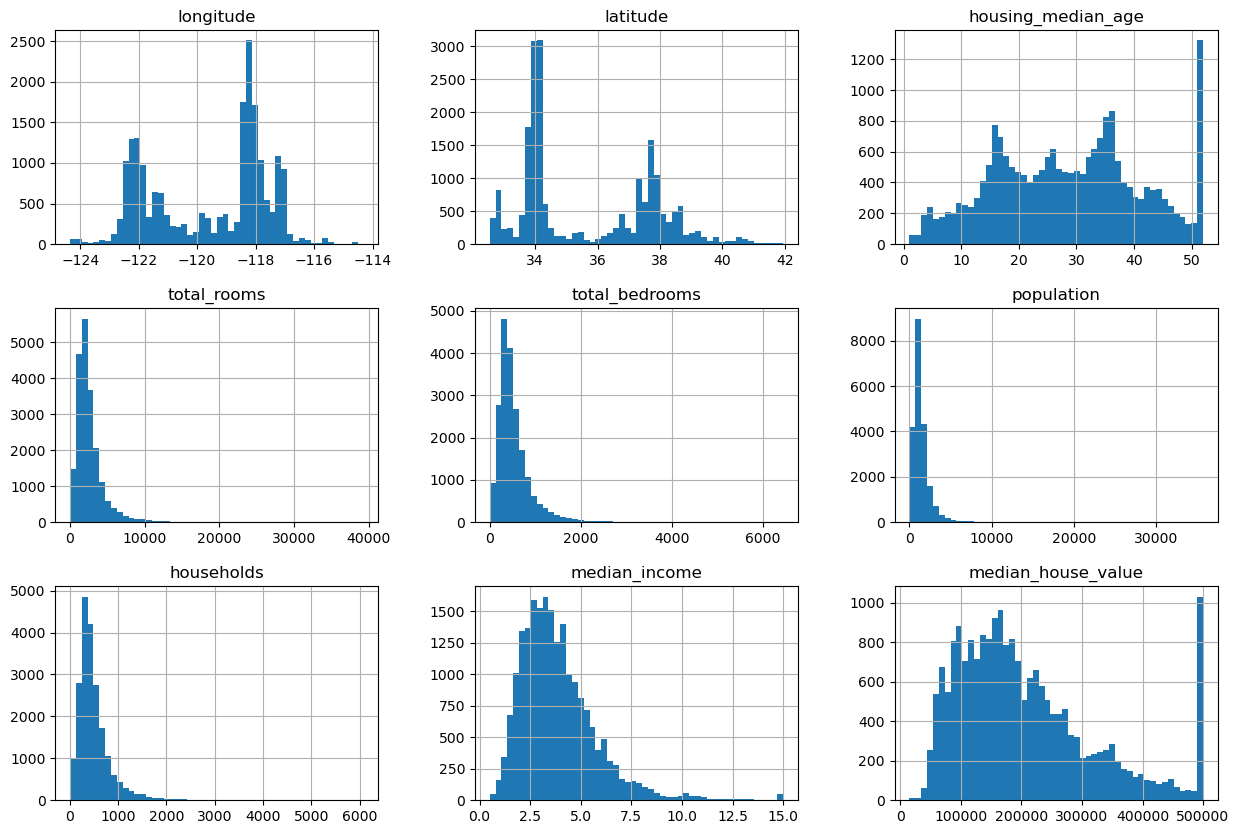

In [18]:
data.hist(bins=50,figsize=(15,10))

<Axes: xlabel='longitude', ylabel='latitude'>

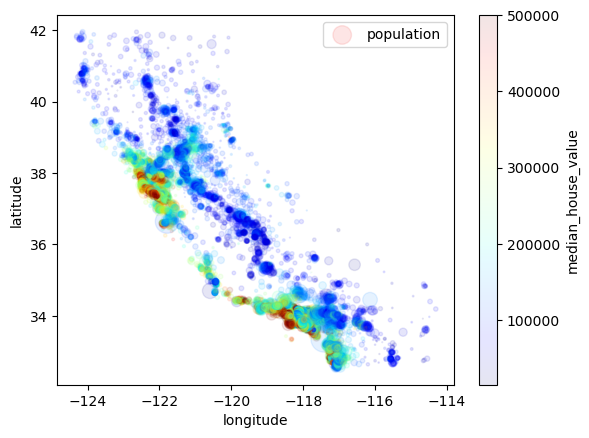

In [19]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=data["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"))

#### Missing Value Imputation

In [20]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [21]:
data=pd.get_dummies(data,columns=['ocean_proximity'],drop_first=True)

#### Feature Target Separation

In [22]:
x = data.drop('median_house_value',axis=1)

In [23]:
y=data['median_house_value']

#### Train test split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Feature Scailing

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Scaled Data to DataFrame

In [28]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns, index=x_test.index)

### Model Training

#### Linear Regression

In [35]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)

#### Ridge Regression

In [36]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled,y_train)
y_pred_ridge = ridge.predict(x_test_scaled)


#### Lasso Regression

In [45]:
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(x_train_scaled,y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

#### Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(x_train_scaled,y_train)
y_pred_dt = dt.predict(x_test)

### Model Evaluation

In [39]:
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true,y_pred)
    print(f"{name} -> RMSE : {rmse:.3f}, R2 : {r2:.3f}")

In [46]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regreesor", y_test, y_pred_ridge)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Linear Regression -> RMSE : 70060.522, R2 : 0.625
Ridge Regreesor -> RMSE : 70057.417, R2 : 0.625
Decision Tree -> RMSE : 264211.192, R2 : -4.327
Lasso Regression -> RMSE : 70060.521, R2 : 0.625


#### Performance Comparision

In [49]:
results = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge Regression", "Decision Tree", "Lasso Regression"],
    "RMSE" : [
         np.sqrt(mean_squared_error(y_test,y_pred_lr)),
         np.sqrt(mean_squared_error(y_test,y_pred_ridge)),
         np.sqrt(mean_squared_error(y_test,y_pred_dt)),
         np.sqrt(mean_squared_error(y_test,y_pred_lasso))
    ],
    "R2" : [
        r2_score(y_test,y_pred_lr),
        r2_score(y_test,y_pred_ridge),
        r2_score(y_test,y_pred_dt),
        r2_score(y_test,y_pred_lasso)
        
    ]
})
        
results     

,Model,RMSE,R2
0,Linear Regression,70060.521845,0.625424
1,Ridge Regression,70057.416870,0.625457
2,Decision Tree,264211.192262,-4.327158
3,Lasso Regression,70060.521172,0.625424


In [ ]:
### Ridge Rgression Algorthim is best fit as it has smallest prediction error among all, highest R2 score and Regularization reduces overfitting 

### Visualization (Predicted vs Actual)

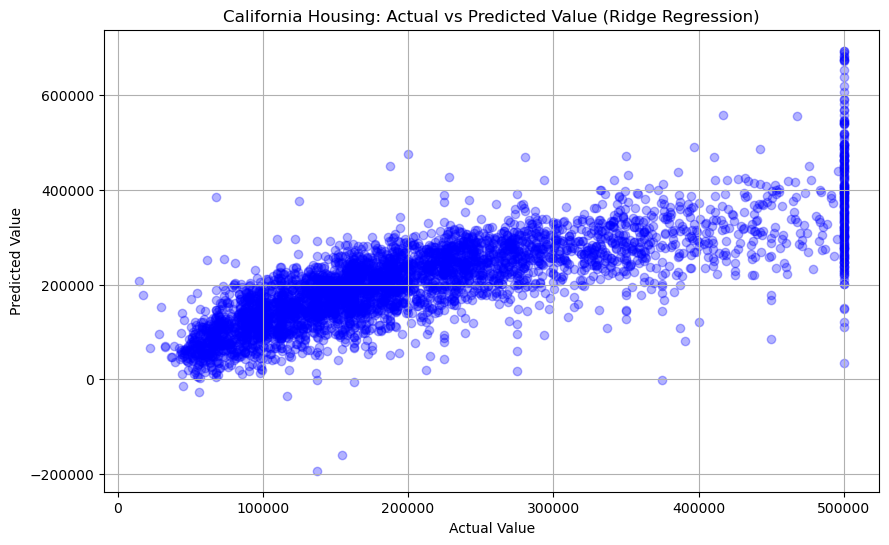

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_ridge,alpha=0.3,color='blue')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('California Housing: Actual vs Predicted Value (Ridge Regression)')
plt.grid(True)
plt.show()
